<a href="https://colab.research.google.com/github/itsdevansh/CSI5388-project/blob/main/S3vm_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df1 = pd.read_csv('/content/bank_cleaned.csv')

In [ ]:
df1.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [ ]:
df1 = df1.drop(columns = ['Unnamed: 0'])

In [ ]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'response', 'response_binary'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              40841 non-null  int64  
 1   job              40841 non-null  object 
 2   marital          40841 non-null  object 
 3   education        40841 non-null  object 
 4   default          40841 non-null  object 
 5   balance          40841 non-null  int64  
 6   housing          40841 non-null  object 
 7   loan             40841 non-null  object 
 8   day              40841 non-null  int64  
 9   month            40841 non-null  object 
 10  duration         40841 non-null  float64
 11  campaign         40841 non-null  int64  
 12  pdays            40841 non-null  int64  
 13  previous         40841 non-null  int64  
 14  poutcome         40841 non-null  object 
 15  response         40841 non-null  object 
 16  response_binary  40841 non-null  int64  
dtypes: float64(1

In [ ]:
y = df1['response_binary']
df1 = df1.drop(['response_binary'], axis=1)

In [ ]:
#The Response and response binanry is the same thing and thats why it was causing dataleakage and also giving perfect F1
df1 = df1.drop(['response'], axis=1)

In [ ]:
print(df1.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


In [ ]:
for i in df1.columns:
    print(i,":",df1[i].unique())

age : [58 44 33 35 28 42 43 41 29 53 57 51 60 56 32 25 40 39 52 46 36 49 59 37
 50 54 55 48 24 38 31 45 47 30 27 34 23 26 61 22 21 20 66 62 83 75 67 65
 68 64 69 72 71 70 76 63 90 82 73 74 78 85 80 94 79 19 77 86 95 81 18 89
 84 87 88]
job : ['management' 'technician' 'entrepreneur' 'retired' 'admin.' 'services'
 'blue-collar' 'self-employed' 'unemployed' 'housemaid' 'student' 'other']
marital : ['married' 'single' 'divorced']
education : ['tertiary' 'secondary' 'primary']
default : ['no' 'yes']
balance : [2143   29    2 ... 7038 9710 9299]
housing : ['yes' 'no']
loan : ['no' 'yes']
day : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration : [ 4.35  2.52  1.27 ... 21.63 20.77 25.93]
campaign : [ 1  2  3  5  4  7  8  6  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
pdays : [ -1 151  

In [ ]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome', 'response']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Define categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']

# Create OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])

# Transform the test data
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Concatenate encoded features with remaining features
X_train_encoded = np.concatenate([X_train_encoded, X_train.drop(columns=categorical_cols)], axis=1)
X_test_encoded = np.concatenate([X_test_encoded, X_test.drop(columns=categorical_cols)], axis=1)


In [ ]:
print(len(X_train_encoded),len(y_train))

27363 27363


In [ ]:
# Justification:
# 1. One-hot encoding is applied to categorical variables to convert them into a numerical format suitable for machine learning algorithms.
# 2. The encoded categorical features are concatenated with the numerical features to create the final training and testing sets.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Transform the testing data
X_test_scaled = scaler.transform(X_test_encoded)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = y.value_counts()

# Step 2: Plot the classes
plt.figure(figsize=(8, 6))
sns.countplot(y)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Step 3: Optionally, you can print the class counts
print("Class Counts:")
print(class_counts)


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7ae6e8715120> (for post_execute):


KeyboardInterrupt: 

## Importing Necessary Libraries

In [ ]:
!pip install category_encoders

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from category_encoders import TargetEncoder
from collections import Counter
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.model_selection import StratifiedKFold

### Fully labelled without Resampling

In [ ]:
pipelines = {
#     'dt': Pipeline([('classifier', DecisionTreeClassifier(random_state=42))]),
    'rf': Pipeline([('classifier', RandomForestClassifier(random_state=42))]),
#     'svm': Pipeline([('classifier', SVC(probability=True, random_state=42))]),
    'gb': Pipeline([('classifier', GradientBoostingClassifier(random_state=42))])
#     'mlp': Pipeline([('classifier', MLPClassifier(random_state=42))]),
#     'knn': Pipeline([('classifier', KNeighborsClassifier())]),
}

#The following are the hyperparameter space for all the six models for the purpose of hyperparameter tuning
param_distributions = {
#     'dt': {
#         'classifier__max_depth': [None, 10, 20, 30, 40, 50],
#         'classifier__min_samples_split': [2, 5, 10],
#         'classifier__min_samples_leaf': [1, 2, 4],
#         'classifier__max_features': ['auto', 'sqrt', 'log2']
#     },
    'rf': {
        'classifier__n_estimators': [150],
        'classifier__max_depth': [30],
        'classifier__min_samples_split': [10],
        'classifier__min_samples_leaf': [2],
        'classifier__max_features': ['auto']
    },
#     'svm': {
#         'classifier__C': [0.1, 1, 10],
#         'classifier__kernel': ['linear', 'rbf', 'poly'],
#         'classifier__gamma': ['scale', 'auto'],
#     },
#     'gb': {
#         'classifier__n_estimators': [50, 100, 150, 200],
#         'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
#         'classifier__max_depth': [3, 5, 7, 10],
#         'classifier__min_samples_split': [2, 5, 10],
#         'classifier__min_samples_leaf': [1, 2, 4],
#         'classifier__subsample': [0.6, 0.8, 1.0],
#     }
    'gb': {
        'classifier__n_estimators': [50],
        'classifier__learning_rate': [0.1],
        'classifier__max_depth': [7],
        'classifier__min_samples_split': [5],
        'classifier__min_samples_leaf': [2],
        'classifier__subsample': [1.0],
    }
#     'mlp': {
#         'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],
#         'classifier__activation': ['logistic', 'tanh', 'relu'],
#         'classifier__alpha': [0.0001, 0.001, 0.01],
#     },
#     'knn': {
#         'classifier__n_neighbors': [3, 5, 7, 9],
#         'classifier__weights': ['uniform', 'distance'],
#         'classifier__p': [1, 2],
#     },
}

In [ ]:
def run_models(X_train, X_test, y_train, y_test):
    best_estimators = {}
    roc_auc_scores = {}
    plt.figure()
    for model_name, pipeline in pipelines.items():
        search = RandomizedSearchCV(
        pipeline,
        param_distributions[model_name],
        n_iter=10,
        cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        verbose=2,
        random_state=42)
        search.fit(X_train, y_train)
        best_estimators[model_name] = search.best_estimator_
        print(f"Best parameters for {model_name}: {search.best_params_}")

        # Predict probabilities for the test data
        y_probs = search.predict_proba(X_test)[:, 1]
        y_pred = search.predict(X_test)

        # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        roc_auc_scores[model_name] = roc_auc

         # Plotting ROC curve data for each model
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

        # Classification Report
        print(f"Classification report for {model_name}:\n{classification_report(y_test, y_pred)}")

        cm = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix for {model_name}:\n{cm}\n")

        print(f"AUC for {model_name}: {roc_auc:.2f}\n")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
%%time
run_models(X_train_scaled, X_test_scaled, y_train, y_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

## Resampling

### Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE oversampling on the training data
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
%%time
run_models(X_train_oversampled, X_test_scaled, y_train_oversampled, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

### Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling on the training data
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_scaled, y_train)

In [ ]:
%%time
run_models(X_train_undersampled, X_test_scaled, y_train_undersampled, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=150; total time=   1.1s


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

## Self Learning

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Levels of unlabeled data to test
levels_of_unlabeled = [0.5, 0.75, 0.9, 0.95, 0.99]

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(min_samples_split=10, min_samples_leaf=2, max_features="sqrt", max_depth=30, n_estimators=100, random_state=42)

# Initialize lists to store results
classification_reports = []
confusion_matrices = []
roc_auc_scores = []

for level in levels_of_unlabeled:
    # Create a copy of the oversampled training data
    X_train_with_unlabeled = X_train_oversampled.copy()
    y_train_with_unlabeled = y_train_oversampled.copy()

    # Set the proportion of labels as unlabeled
    num_unlabeled_samples = int(len(y_train_with_unlabeled) * level)
    unlabeled_indices = np.random.choice(len(y_train_with_unlabeled), num_unlabeled_samples, replace=False)
    y_train_with_unlabeled[unlabeled_indices] = -1  # Mark selected labels as unlabeled

    # Initialize the SelfTrainingClassifier with Random Forest as the base estimator
    self_learning_classifier = SelfTrainingClassifier(rf_classifier)

    # Fit the self-learning classifier on the modified training data
    self_learning_classifier.fit(X_train_with_unlabeled, y_train_with_unlabeled)

    # Predict on the test set
    y_pred = self_learning_classifier.predict(X_test_scaled)

    # Calculate classification report and confusion matrix
    classification_reports.append(classification_report(y_test, y_pred, output_dict=True))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

    # Calculate ROC curve and AUC score
    y_prob = self_learning_classifier.predict_proba(X_test_scaled)[:, 1]
    roc_auc_scores.append(roc_auc_score(y_test, y_prob))

# Print classification reports, confusion matrices, and ROC AUC scores for each level
for i, level in enumerate(levels_of_unlabeled):
    print(f"Level of Unlabeled Data: {level * 100}%")
    print("Classification Report:")
    print(classification_reports[i])
    print("Confusion Matrix:")
    print(confusion_matrices[i])
    print("ROC AUC Score:", roc_auc_scores[i])
    print("=" * 50)


KeyboardInterrupt: 

## CoTraining

In [ ]:
# Define the levels of unlabeled data to test
unlabeled_levels = [0.5, 0.75, 0.9, 0.95, 0.99]

for level in unlabeled_levels:
    # Calculate the number of unlabeled samples based on the level
    num_unlabeled_samples = int(len(y_train_oversampled) * level)

    # Randomly select indices to mark as unlabeled
    unlabeled_indices = np.random.choice(len(y_train_oversampled), num_unlabeled_samples, replace=False)

    # Mark selected labels as unlabeled
    y_train_with_unlabeled = y_train.copy()
    y_train_with_unlabeled[unlabeled_indices] = -1

    # Initialize the base classifiers with the provided hyperparameters
    rf_classifier = RandomForestClassifier(min_samples_split=10, min_samples_leaf=2, max_features="sqrt", max_depth=30, n_estimators=100, random_state=42)
    gb_classifier = GradientBoostingClassifier(subsample=1.0, n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_depth=7, learning_rate=0.1, random_state=42)

    # Initialize the Self-training classifier with Random Forest as the base estimator
    self_training_classifier = SelfTrainingClassifier(rf_classifier, threshold=0.8)  # Adjust the threshold value as needed

    # Fit the self-training classifier on the training data with a certain level of unlabeled data
    self_training_classifier.fit(X_train_scaled, y_train_with_unlabeled)

    # Predict on the test set
    y_pred = self_training_classifier.predict(X_test_scaled)

    # Print classification report
    print(f"Classification Report for {level * 100}% Unlabeled Data:")
    print(classification_report(y_test, y_pred))

    # Print confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Calculate ROC curve and AUC score
    y_prob = self_training_classifier.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {level * 100}% Unlabeled Data')
    plt.legend(loc="lower right")
    plt.show()


### Ensemble Semi-Supervised Example

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import numpy as np

def ensemble_ss_classifier(estimators, dataset):
    x_combined, y_combined = dataset
    ensemble = []
    for estimator in estimators:
        sf_clf = SelfTrainingClassifier(estimator, threshold=0.8)
        sf_clf.fit(x_combined, y_combined)
        ensemble.append(sf_clf)

    return ensemble

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import numpy as np

def ensemble_ss_classifier(estimators, dataset):
    x_combined, y_combined = dataset
    ensemble = []
    for estimator in estimators:
        sf_clf = SelfTrainingClassifier(estimator, threshold=0.8)
        sf_clf.fit(x_combined, y_combined)
        ensemble.append(sf_clf)

    return ensemble

Accuracy: 0.871791066923876
Level of Unlabeled Data: 50.0%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.92     11947
           1       0.46      0.77      0.58      1531

    accuracy                           0.87     13478
   macro avg       0.71      0.83      0.75     13478
weighted avg       0.91      0.87      0.88     13478

Confusion Matrix:
[[10574  1373]
 [  355  1176]]
Accuracy: 0.8631102537468467
Level of Unlabeled Data: 75.0%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     11947
           1       0.44      0.79      0.57      1531

    accuracy                           0.86     13478
   macro avg       0.71      0.83      0.74     13478
weighted avg       0.91      0.86      0.88     13478

Confusion Matrix:
[[10420  1527]
 [  318  1213]]
Accuracy: 0.8413711233120641
Level of Unlabeled Data: 90.0%
Classification Report:


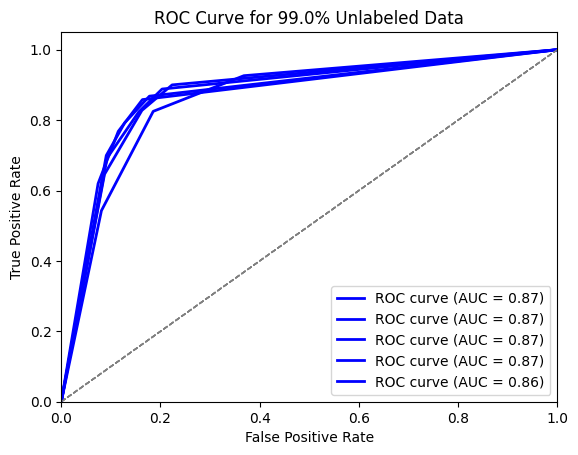

In [ ]:
# Define the levels of unlabeled data to test
unlabeled_levels = [0.5, 0.75, 0.9, 0.95, 0.99]
classification_reports= []
confusion_matrices = []
roc_auc_scores = []
for level in unlabeled_levels:
    # Calculate the number of unlabeled samples based on the level
    num_unlabeled_samples = int(len(y_train_oversampled) * level)

    # Randomly select indices to mark as unlabeled
    unlabeled_indices = np.random.choice(len(y_train_oversampled), num_unlabeled_samples, replace=False)

    # Mark selected labels as unlabeled
    y_train_with_unlabeled = y_train_oversampled.copy()
    y_train_with_unlabeled[unlabeled_indices] = -1

    ensemble_clf = ensemble_ss_classifier([LogisticRegression(max_iter = 2000), RandomForestClassifier(), GradientBoostingClassifier()],
                                         [X_train_oversampled, y_train_with_unlabeled])

    predictions = [clf.predict(X_test_scaled) for clf in ensemble_clf]
    final_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
    accuracy = np.mean(final_predictions == y_test)
    print("Accuracy:", accuracy)

    # Predict on the test set
    y_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

    # Calculate classification report and confusion matrix
    print(f"Level of Unlabeled Data: {level * 100}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Calculate ROC curve and AUC score
    y_prob = [clf.predict_proba(X_test_scaled) for clf in ensemble_clf]
    y_pred = np.mean(np.argmax(y_prob, axis = -1), axis = 0)

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, y_pred))
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {level * 100}% Unlabeled Data')
    plt.legend(loc="lower right")
plt.show()


## QN3SVM and S3VM

### S3VM Train

In [ ]:
!git clone https://github.com/Akshat23x3/semisup-learn.git
!pip install /content/semisup-learn

fatal: destination path 'semisup-learn' already exists and is not an empty directory.
Processing ./semisup-learn
  Preparing metadata (setup.py) ... done
  Created wheel for semisup-learn: filename=semisup_learn-0.0.1-py3-none-any.whl size=19169 sha256=e2e177af16ac6f0879b4d68f36c256e24d386e962d49ada5f0af22c299e172b5
  Stored in directory: /root/.cache/pip/wheels/07/d5/5f/51f0a9731f086808d3e80c30200a98805963bbd32b91766ea8
Successfully built semisup-learn
  Attempting uninstall: semisup-learn
    Found existing installation: semisup-learn 0.0.1
    Uninstalling semisup-learn-0.0.1:
      Successfully uninstalled semisup-learn-0.0.1


Exception ignored in: <_io.FileIO name='/usr/local/lib/python3.10/dist-packages/semisup_learn-0.0.1.dist-info/top_level.txt' mode='rb' closefd=True>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py", line 86, in _extract_toplevel_packages
    for line in open(toplevel):


In [ ]:
!pip install nlopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.7/423.7 kB 2.9 MB/s eta 0:00:00


Exception ignored in: <_io.FileIO name='/usr/local/lib/python3.10/dist-packages/nlopt-2.7.1.dist-info/top_level.txt' mode='rb' closefd=True>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py", line 86, in _extract_toplevel_packages
    for line in open(toplevel):


slice indices must be integers or None or have an __index__ method
Level of Unlabeled Data: 50.0%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     11947
           1       0.34      0.83      0.48      1531

    accuracy                           0.80     13478
   macro avg       0.66      0.81      0.68     13478
weighted avg       0.90      0.80      0.83     13478

Confusion Matrix:
[[9479 2468]
 [ 255 1276]]
slice indices must be integers or None or have an __index__ method
Level of Unlabeled Data: 75.0%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     11947
           1       0.21      0.72      0.33      1531

    accuracy                           0.66     13478
   macro avg       0.58      0.69      0.55     13478
weighted avg       0.86      0.66      0.72     13478

Confusion Matrix:
[[7831 4116]
 [ 428 1103]]
slice indices 

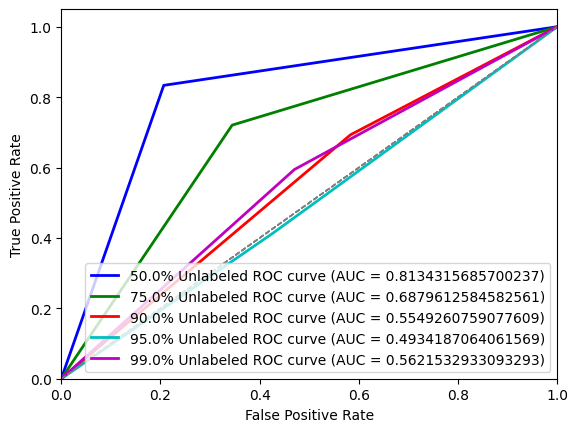

In [ ]:
import time
import sklearn
from frameworks.CPLELearning import CPLELearningModel
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Define the levels of unlabeled data to test
unlabeled_levels = [0.5, 0.75, 0.9, 0.95, 0.99]
colors = ['b', 'g', 'r', 'c', 'm']
classification_reports= []
confusion_matrices = []
roc_auc_scores = []
for index ,level in enumerate(unlabeled_levels):
    # Calculate the number of unlabeled samples based on the level
    num_unlabeled_samples = int(len(y_train_undersampled) * level)

    # Randomly select indices to mark as unlabeled
    unlabeled_indices = np.random.choice(len(y_train_undersampled), num_unlabeled_samples, replace=False)

    # Mark selected labels as unlabeled
    y_train_with_unlabeled = y_train_undersampled.copy()
    y_train_with_unlabeled[unlabeled_indices] = -1

    start_time = time.time()

    model =  CPLELearningModel(sklearn.svm.SVC(kernel="rbf", probability=True), predict_from_probabilities=True)

    model.fit(X_train_undersampled, y_train_with_unlabeled)

    t = time.time()-start_time

    y_prob = model.predict_proba(X_test_scaled)
    y_pred =  model.predict(X_test_scaled)

    # Calculate classification report and confusion matrix
    print(f"Level of Unlabeled Data: {level * 100}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Calculate ROC curve and AUC score


    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, color=colors[index], lw=2, label=f'{level * 100}% Unlabeled ROC curve (AUC = {roc_auc_score(y_test, y_pred)})')
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
plt.show()

In [ ]:
import time
import sklearn
from frameworks.CPLELearning import CPLELearningModel
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Define the levels of unlabeled data to test
unlabeled_levels = [0.5, 0.75, 0.9, 0.95, 0.99]
colors = ['b', 'g', 'r', 'c', 'm']
classification_reports= []
confusion_matrices = []
roc_auc_scores = []
for index ,level in enumerate(unlabeled_levels):
    # Calculate the number of unlabeled samples based on the level
    num_unlabeled_samples = int(len(y_train) * level)

    # Randomly select indices to mark as unlabeled
    unlabeled_indices = np.random.choice(len(y_train), num_unlabeled_samples, replace=False)

    # Mark selected labels as unlabeled
    y_train = np.array(y_train)
    y_train_with_unlabeled = y_train.copy()
    y_train_with_unlabeled[unlabeled_indices] = -1

    start_time = time.time()

    model =  CPLELearningModel(sklearn.svm.SVC(kernel="rbf", probability=True), predict_from_probabilities=True)

    model.fit(X_train_scaled, y_train_with_unlabeled)

    t = time.time()-start_time

    y_prob = model.predict_proba(X_test_scaled)
    y_pred =  model.predict(X_test_scaled)

    # Calculate classification report and confusion matrix
    print(f"Level of Unlabeled Data: {level * 100}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Calculate ROC curve and AUC score


    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, color=colors[index], lw=2, label=f'{level * 100}% Unlabeled ROC curve (AUC = {roc_auc_score(y_test, y_pred)})')
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
plt.show()

KeyboardInterrupt: 